<a href="https://colab.research.google.com/github/OmarAhmed03/Classifier/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# importing the data

In [ ]:
data = pd.read_excel("cleaned data.xlsx")

In [ ]:
data = data.iloc[:,1:]
data

,contractSymbol,lastTradeDate,strike,lastPrice,impliedVolatility,expiry_date,symbol,dates diff,Stock price
0,MSFT231208C00170000,2023-12-06,170.0,198.95,5.085941,2023-12-08,MSFT,2,368.799988
1,MSFT231208C00210000,2023-11-01,210.0,135.35,5.415042,2023-12-08,MSFT,37,345.369019
2,MSFT231208C00235000,2023-11-14,235.0,135.42,3.187502,2023-12-08,MSFT,24,369.519989
3,MSFT231208C00240000,2023-12-04,240.0,128.70,3.602540,2023-12-08,MSFT,4,369.140015
4,MSFT231208C00245000,2023-12-01,245.0,127.40,2.300785,2023-12-08,MSFT,7,374.510010
...,...,...,...,...,...,...,...,...,...
4692,AAPL260116C00280000,2023-12-07,280.0,6.70,0.249046,2026-01-16,AAPL,771,194.270004
4693,AAPL260116C00285000,2023-12-07,285.0,6.15,0.247230,2026-01-16,AAPL,771,194.270004
4694,AAPL260116C00290000,2023-12-07,290.0,5.36,0.245308,2026-01-16,AAPL,771,194.270004
4695,AAPL260116C00300000,2023-12-07,300.0,4.45,0.242836,2026-01-16,AAPL,771,194.270004


# Selecting data
*   data is selected at strike price in range of [148-400]
*   the input to the model is the following columns ['strike','impliedVolatility','dates diff','Stock price']
*   the output is lastPrice : call option price column




In [ ]:
mask = (data['strike'] >= 148) & (data['strike'] <= 400)
data = data[mask]

In [ ]:
data.describe()

,strike,lastPrice,impliedVolatility,dates diff,Stock price
count,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000
mean,253.065153,42.512479,0.496647,198.165959,256.769937
std,73.860602,53.338181,0.361461,242.903749,79.980427
min,148.000000,0.010000,0.000010,1.000000,138.070007
25%,187.292500,1.160000,0.306968,29.000000,194.270004
50%,240.000000,19.470000,0.461706,77.500000,242.639999
75%,313.747500,65.985000,0.556050,288.000000,368.799988
max,400.000000,238.000000,5.415042,819.000000,382.700012


In [ ]:
X = data[['strike','impliedVolatility','dates diff','Stock price']]
Y = data['lastPrice']


# Data normalization
*   data is normalized according to **z-score **
*   z-score = ( x - mean(x) )/ std(x))
*   normaliztion is done to simplify the calculations and eliminiate outliers effect

In [ ]:
meanx = np.mean(X)
meany = np.mean(Y)
stdx = np.std(X)
stdy = np.std(Y)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
X = (X - np.mean(X))/np.std(X)
Y = (Y - np.mean(Y))/np.std(Y)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


this is how normalized data look like

In [ ]:
X

,strike,impliedVolatility,dates diff,Stock price
0,-1.124859,12.699191,-0.807759,1.401016
1,-0.583184,13.609858,-0.663638,1.107995
2,-0.244636,7.445956,-0.717169,1.410020
3,-0.176927,8.594421,-0.799523,1.405268
4,-0.109217,4.992292,-0.787170,1.472424
...,...,...,...,...
4692,0.364749,-0.685145,2.358776,-0.781606
4693,0.432458,-0.690169,2.358776,-0.781606
4694,0.500168,-0.695489,2.358776,-0.781606
4695,0.635587,-0.702329,2.358776,-0.781606


**descriptive stats for the normalized x**

In [ ]:
X.describe()

,strike,impliedVolatility,dates diff,Stock price
count,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03
mean,-1.206354e-17,6.031772e-17,6.031772e-17,7.238126e-17
std,1.000212e+00,1.000212e+00,1.000212e+00,1.000212e+00
min,-1.422781e+00,-1.374261e+00,-8.118764e-01,-1.484427e+00
25%,-8.906862e-01,-5.248673e-01,-6.965799e-01,-7.816062e-01
50%,-1.769269e-01,-9.668704e-02,-4.968700e-01,-1.767049e-01
75%,8.217538e-01,1.643758e-01,3.699124e-01,1.401016e+00
max,1.989776e+00,1.360986e+01,2.556428e+00,1.574845e+00


# data splitting to train and test

*   20% of data is for test 80% for train
*   data is shuffled to avoid patterns



In [ ]:
X_train,X_test ,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=40)

## The AI Model


*  the model is ANN Deep learning model
*   model consists of 5 dense layers as shown in code
*   hidden layers has **relu** activation  and nuerons number as shown in code for each layer and output layer has linear activation as it is a regression model




In [ ]:
model = tf.keras.Sequential([

    tf.keras.layers.Dense(128, activation='relu', input_shape=(4,)),
    #tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])



*   model uses ADAM optimizer and MSE error loss
*   the model has a callback that stops learning if the validation loss doesn't change after 10 iterations



In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
cb = tf.keras.callbacks.EarlyStopping(patience=10,monitor='val_loss')

model is trained with train data and 1000 iterations 32 batch size and validition step is done with validation data of 30% of the train data

In [ ]:
model.fit(X_train,y_train,epochs=1000,validation_split=0.3,callbacks=cb,batch_size = 32)

Epoch 1/1000
42/42 [==============================] - 1s 7ms/step - loss: 0.6858 - val_loss: 0.3350
Epoch 2/1000
42/42 [==============================] - 0s 4ms/step - loss: 0.1128 - val_loss: 0.0183
Epoch 3/1000
42/42 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0071
Epoch 4/1000
42/42 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.0049
Epoch 5/1000
42/42 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0040
Epoch 6/1000
42/42 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 7/1000
42/42 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0046
Epoch 8/1000
42/42 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0043
Epoch 9/1000
42/42 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0033
Epoch 10/1000
42/42 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0042

evaluation of model at test data which shows a very low MSE

In [ ]:
model.evaluate(X_test,y_test)

15/15 [==============================] - 0s 2ms/step - loss: 0.0028


0.0028304974548518658

In [ ]:
y_predict = model.predict(X_test)

15/15 [==============================] - 0s 2ms/step


Denormalizing the data

In [ ]:
y_predict1 = (y_predict * stdy) + meany
y_real = (y_test * stdy) + meany

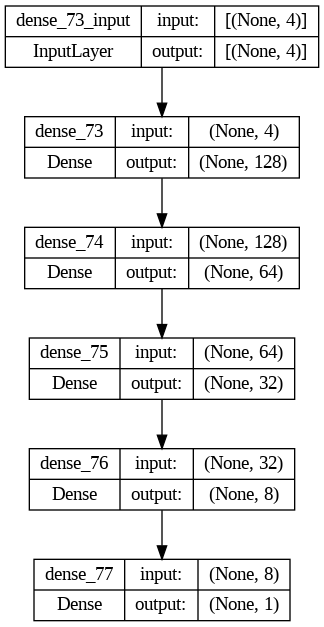

In [ ]:
tf.keras.utils.plot_model(model, to_file='architecture.png', show_shapes=True)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,mean_squared_log_error

unnormalize the data for the plot

In [ ]:
x1 = np.array(X_test['Stock price'])
y1 = np.array(X_test['dates diff'])
z1_real = np.array(y_test)
z1_predict = np.array(y_predict)

plot that compares Actual price with th Ai price

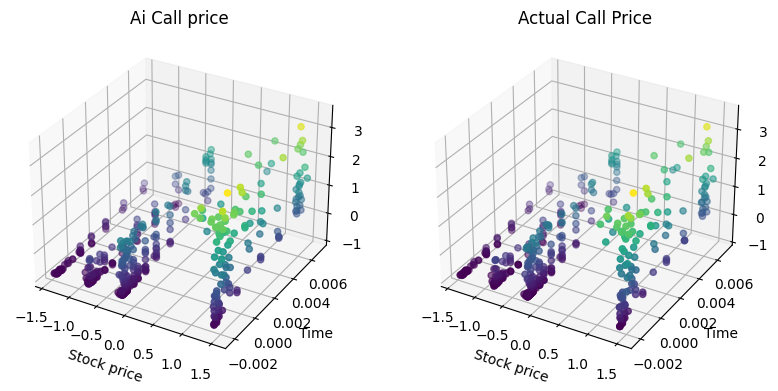

In [ ]:


# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(x1, y1/365, z1_predict,c=z1_predict)
plt.xlabel('Stock price')
plt.ylabel('Time')
plt.title('Ai Call price')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(x1, y1/365, z1_real,c=z1_real)
plt.xlabel('Stock price')
plt.ylabel('Time')
plt.title('Actual Call Price')

plt.show()

In [ ]:
X_test = (X_test * stdx) + meanx
y_test = (y_test * stdy) + meany
y_predict = (y_predict * stdy) + meany

In [ ]:
x1 = np.array(X_test['Stock price'])
y1 = np.array(X_test['dates diff'])
z1_real = np.array(y_test)
z1_predict = np.array(y_predict)

getting the data from BS solution

In [ ]:
import numpy as np
from scipy.stats import norm
def black_scholes_analytic(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price

In [ ]:
y_bs = black_scholes_analytic(x1,X_test['strike'],y1/365,0.05,X_test['impliedVolatility'])

plot of BS,Ai, ACtual solution

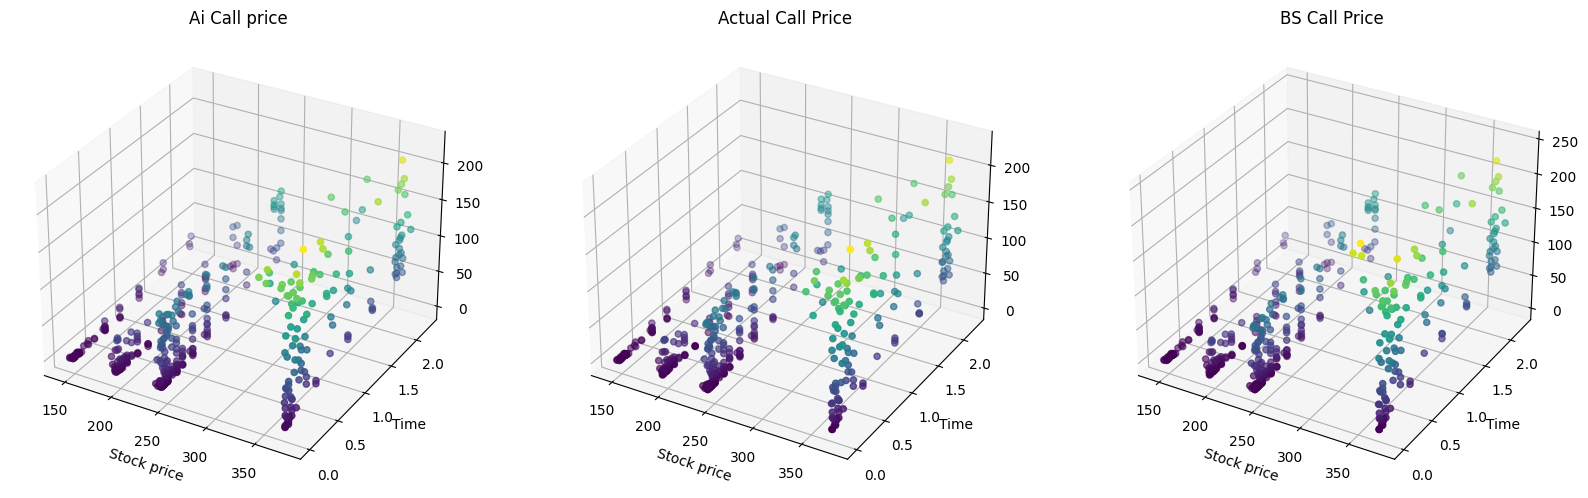

In [ ]:
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(2, 3, 1, projection='3d')
ax.scatter(x1, y1/365, z1_predict,c=z1_predict)
plt.xlabel('Stock price')
plt.ylabel('Time')
plt.title('Ai Call price')

ax = fig.add_subplot(2, 3, 2, projection='3d')
ax.scatter(x1, y1/365, z1_real,c=z1_real)
plt.xlabel('Stock price')
plt.ylabel('Time')
plt.title('Actual Call Price')

ax = fig.add_subplot(2, 3, 3, projection='3d')
ax.scatter(x1, y1/365, y_bs,c=y_bs)
plt.xlabel('Stock price')
plt.ylabel('Time')
plt.title('BS Call Price')

plt.show()

In [ ]:
mse = mean_squared_error(z1_real,z1_predict)
mae = mean_absolute_error(z1_real,z1_predict)
mape = mean_absolute_percentage_error(z1_real,z1_predict)
#msle = mean_squared_log_error(y_real,y_predict1)
mse

8.049236274023809

error metrics of the Ai solution

In [ ]:
metrics_dict = {
    'Mean Squared Error': mse,
    'Mean Absolute Error': mae,
    'Mean Absolute Percentage Error': mape,
}

metrics_df = pd.DataFrame.from_dict(metrics_dict,orient="index")
metrics_df

,0
Mean Squared Error,8.049236
Mean Absolute Error,1.489301
Mean Absolute Percentage Error,7.607395
